In [2]:
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt
data = pd.read_csv("D:/restaurant_dataset.csv")
print(data.head(1))

   Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   

                                    Locality  \
0  Century City Mall, Poblacion, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   

                     Cuisines  ...          Currency Has Table booking  \
0  French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  

[1 rows x 21 columns]


# Level3
## Task1: Restaurant Reviews

## Analyze the text reviews to identify the most common positive and negative keywords.



In [38]:
rating_texts = data['Rating text']
def clean_and_tokenize(text):
    words = re.sub(r'[^a-zA-Z\s]', '', text).lower().split()
    return words

all_words = []
for text in rating_texts:
    all_words.extend(clean_and_tokenize(text))

positive_keywords = ['excellent',  'good', 'very good', 'average']
negative_keywords = ['poor', 'Not rated']
word_counts = Counter(all_words)
positive_counts = {word: word_counts[word] for word in positive_keywords if word in word_counts}
negative_counts = {word: word_counts[word] for word in negative_keywords if word in word_counts}
print("Most Common Positive Keywords:",positive_counts)
print("\nMost Common Negative Keywords:",negative_counts)

Most Common Positive Keywords: {'excellent': 301, 'good': 3179, 'average': 3737}

Most Common Negative Keywords: {'poor': 186}


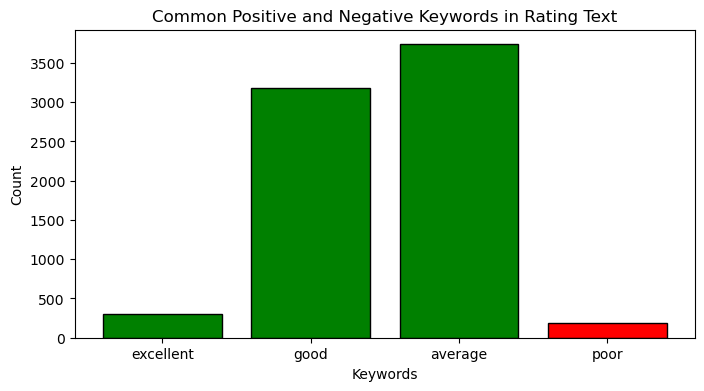

In [34]:
labels, values = zip(*{**positive_counts, **negative_counts}.items())
colors = ['green' if word in positive_keywords else 'red' for word in labels]

plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=colors, edgecolor='black')
plt.title("Common Positive and Negative Keywords in Rating Text")
plt.ylabel("Count")
plt.xlabel("Keywords")
plt.show()


## Calculate the average length of reviews and explore if there is a relationship between review length and rating.


In [87]:
data['Review length']= data['Rating text'].apply(len)
review_length= data['Rating text'].value_counts()
print("Review length :",review_length)

average_length = data['Review length'].mean()
print(f"Average Review Length: {average_length:.2f} words")


Review length : Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64
Average Review Length: 7.02 words


In [83]:
length_by_rating = data.groupby('Aggregate rating')['Review length'].mean()
print("\nAverage Review Length by Rating:")
print(length_by_rating)



Average Review Length by Rating:
Aggregate rating
0.0    9.0
1.8    4.0
1.9    4.0
2.0    4.0
2.1    4.0
2.2    4.0
2.3    4.0
2.4    4.0
2.5    7.0
2.6    7.0
2.7    7.0
2.8    7.0
2.9    7.0
3.0    7.0
3.1    7.0
3.2    7.0
3.3    7.0
3.4    7.0
3.5    4.0
3.6    4.0
3.7    4.0
3.8    4.0
3.9    4.0
4.0    9.0
4.1    9.0
4.2    9.0
4.3    9.0
4.4    9.0
4.5    9.0
4.6    9.0
4.7    9.0
4.8    9.0
4.9    9.0
Name: Review length, dtype: float64


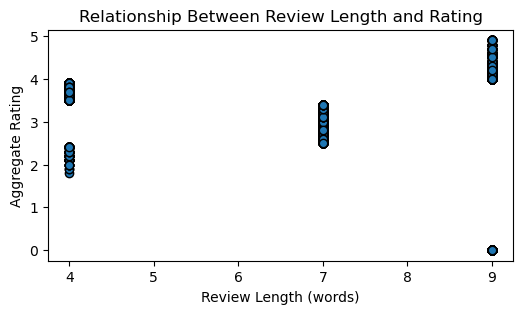

In [99]:
plt.figure(figsize=(6, 3))
plt.scatter(data['Review length'], data['Aggregate rating'], edgecolor='black')
plt.title("Relationship Between Review Length and Rating")
plt.xlabel("Review Length (words)")
plt.ylabel("Aggregate Rating")
plt.show()

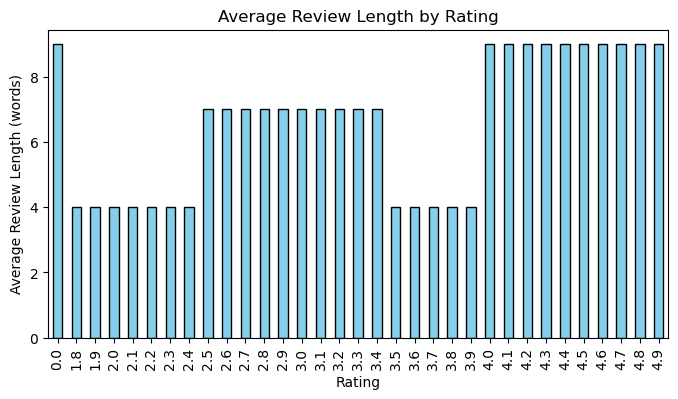

In [97]:
plt.figure(figsize=(8, 4))
length_by_rating.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Review Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Review Length (words)")
plt.show()